In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create dataframe and read csv file from github

Loan_asp = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
Loan_asp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking the columns of the dataset

Loan_asp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases.
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

In [4]:
#Shape of the dataset

Loan_asp.shape

(614, 13)

We can see 614 No of Rows and 13 No of Columns present in this dataset.

In [5]:
#Getting information of the dataset

Loan_asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Checking the null values

Loan_asp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

7 out of 13 columns contains missing value.

<AxesSubplot:>

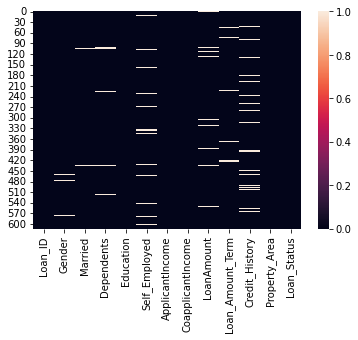

In [7]:
#Plottong heatmap from null values

sns.heatmap(Loan_asp.isnull())

## Separating numerical and categorical column from dataset

In [8]:
#Checking for categorical columnn

categorical_col=[]

for i in Loan_asp.dtypes.index:
    if Loan_asp.dtypes[i] == 'object':
        categorical_col.append(i)
print('Categorical Columns: ', categorical_col)
print('\n')


#checking for numerical columns
numerical_col=[]

for i in Loan_asp.dtypes.index:
    if Loan_asp.dtypes[i] != 'object':
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)

Categorical Columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
#Statistical summary of the dataset

Loan_asp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Checking correlation between numerical columns

In [10]:
Loan_asp.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


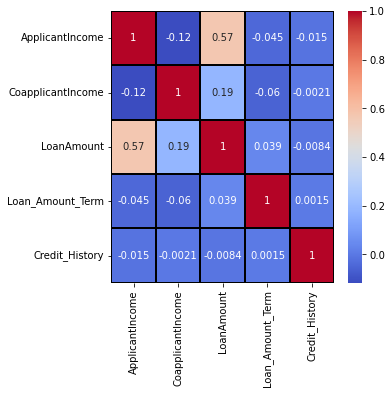

In [11]:
#Visualize correlation by plotting heatmap

plt.figure(figsize=(5,5))
sns.heatmap(Loan_asp.corr(), annot = True, linewidth = 0.2, linecolor = 'black', cmap = 'coolwarm')
plt.show()

## Now imputing missing values

In [12]:
#Imputing missing values

for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',  'Loan_Amount_Term', 'Credit_History']:
    Loan_asp[column].fillna(Loan_asp[column].mode()[0], inplace=True)

In [13]:
#Now checking missing values after imputing
Loan_asp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Checking value counts from columns and visualize countplot

In [14]:
Columns = ['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in Columns:
    print(i)
    print(Loan_asp[i].value_counts())
    print('===========================================')

Gender
Male      502
Female    112
Name: Gender, dtype: int64
Married
Yes    401
No     213
Name: Married, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


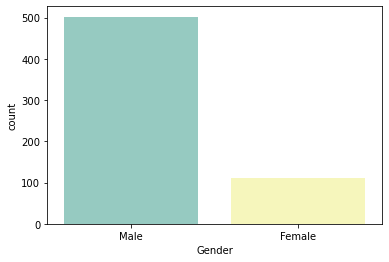

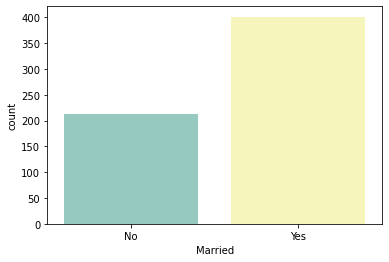

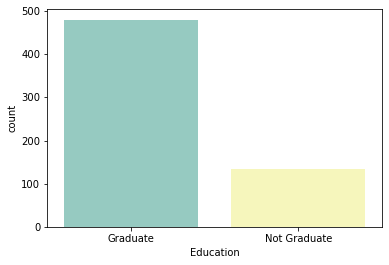

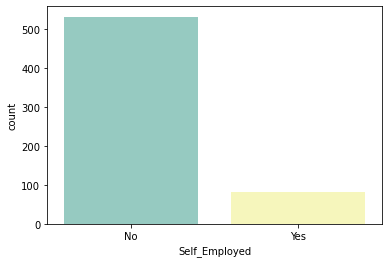

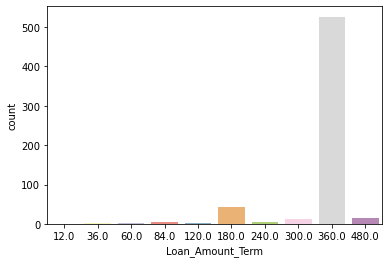

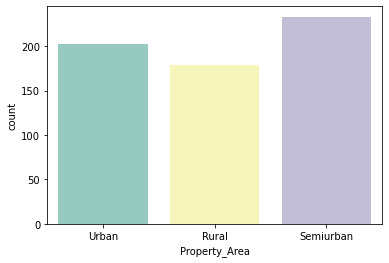

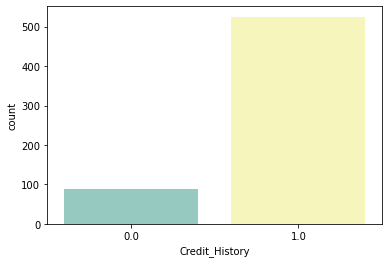

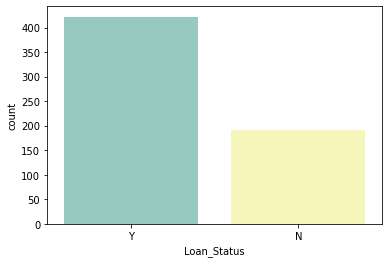

In [15]:
#Visualize countplot
sns.countplot('Gender', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Married', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Education', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Self_Employed', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Loan_Amount_Term', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Property_Area', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Credit_History', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

sns.countplot('Loan_Status', data=Loan_asp, palette='Set3')
plt.show()
print("==========================================================")

1. Gender = More than 500 males apply loan application.
2. MArried = Many Married peoples apply for loan.
3. Education = More than 400 Gradute people apply for loan.
4. Self Employed = Only 82 Self empoyed people apply for loan and 500+ not self employed person have apply loan appilcation.
5. Loan amount term = How many Time to pay for loan amount.
6. Property area = Semiurban get maximum property area.
7. Credit history = Most people's are able to repay debits loan amount.
8. Loan status = Most people's are eligible to be to loan.

## Removing unnecassary column from dataset

In [16]:
Loan_asp.drop(['Loan_ID'], axis=1, inplace=True)

In [17]:
Loan_asp.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Label encoding

In [18]:
#Using label encoder

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

varible = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

for i in varible:
    Loan_asp[i]=label.fit_transform(Loan_asp[i])

In [19]:
Loan_asp.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Checking outliers in dataset

In [20]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

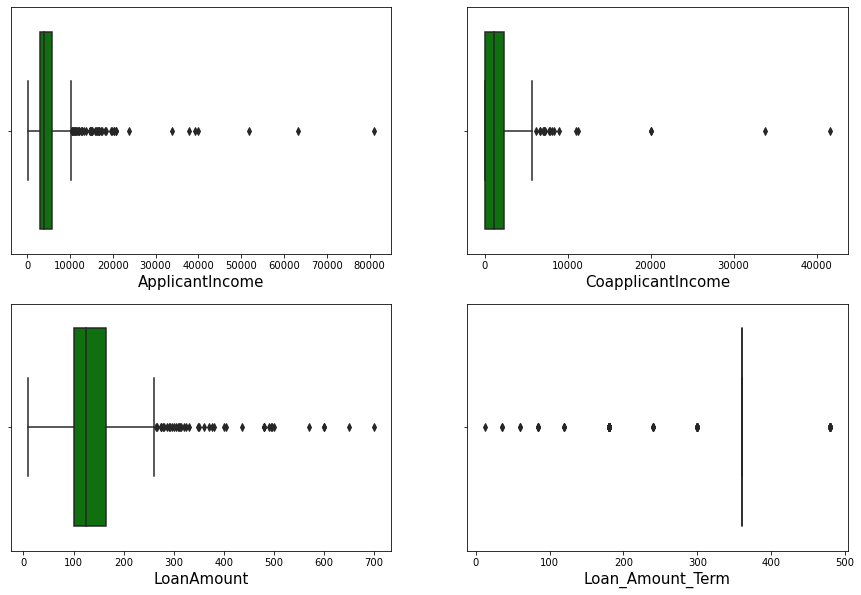

In [21]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(Loan_asp[column],color='g')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

We can see many outliers present in numerical columns.

## Maping dependents column

In [22]:
Loan_asp['Dependents'] = Loan_asp.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [23]:
Loan_asp['Dependents'] =pd.to_numeric(Loan_asp['Dependents'])

## Removing outliers

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(Loan_asp))
threshold = 3
Loan_asp1 = Loan_asp[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", Loan_asp.shape)
print ("Shape of the dataframe after removing outliers: ", Loan_asp1.shape)
print ("Percentage of data loss post outlier removal: ", (Loan_asp.shape[0]-Loan_asp1.shape[0])/Loan_asp.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


## Checking skewness from dataset

In [25]:
Loan_asp.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

## Visualize distplot from column

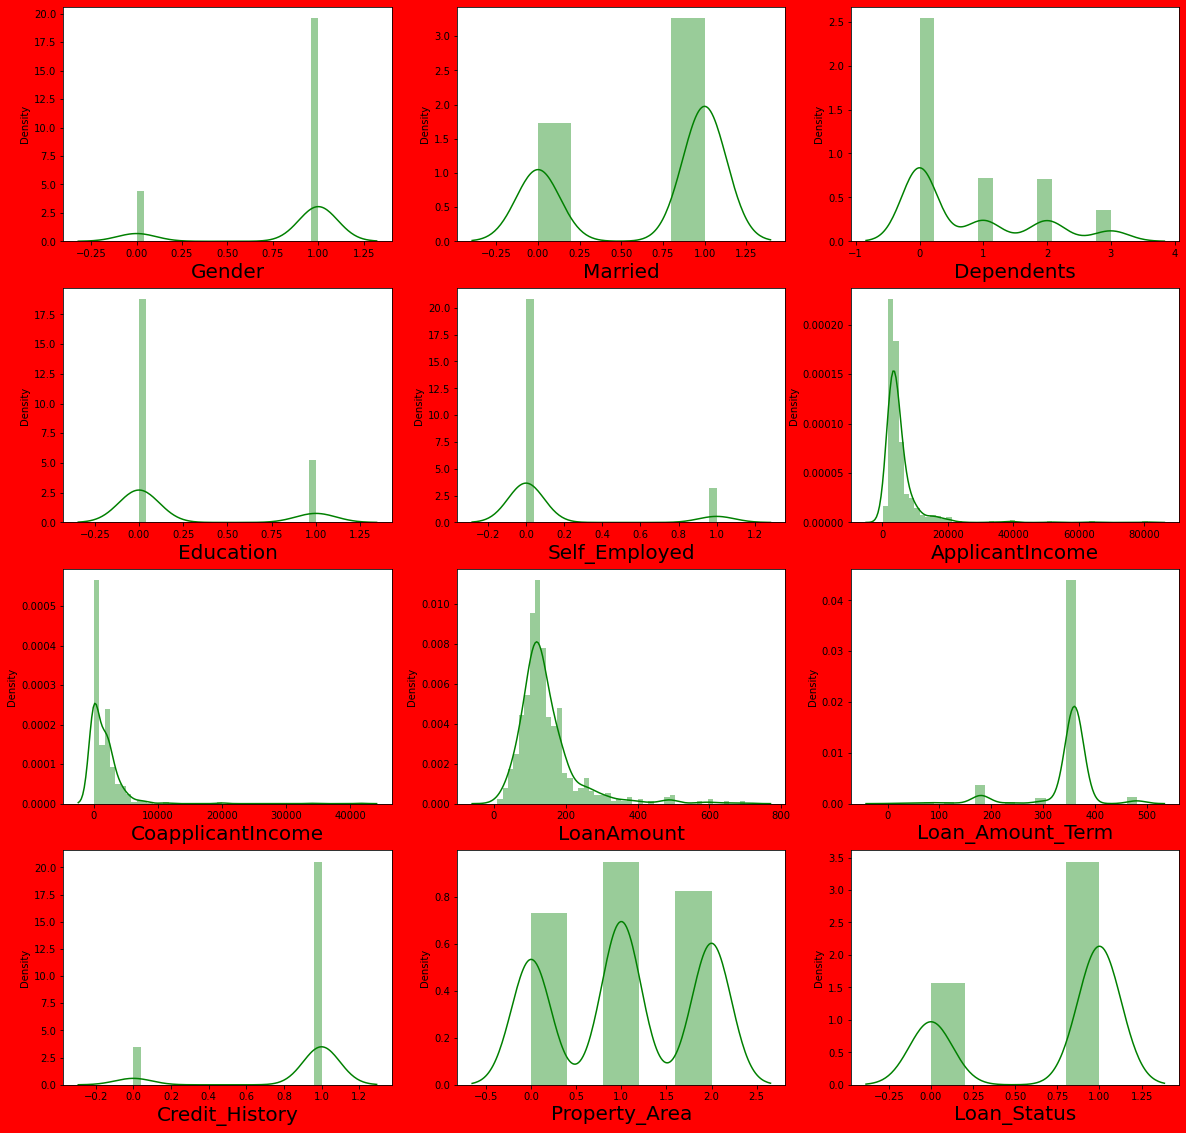

In [26]:
#Let's visualize distplot from columns

plt.figure(figsize=(20,25), facecolor='Red')
plotnumber =1

for column in Loan_asp:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(Loan_asp[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.show()

We can see if there are skewness present in dataset.

1. WE skew only 'ApplicantIncome','CoapplicantIncome', 'LoanAmount' this columns because these are numerical columns and these column distribution is highly skewed because these column skewness is less than -1 or greater than 1.
2. 'Prperty_Area' is also numerical column but this column skewness is good because this column skewness is between -1 and -0.5 or between 0.5 and 1,

## Removing skewness using yeu-johnson method

In [27]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [29]:
Loan_asp[skew] = scaler.fit_transform(Loan_asp[skew].values)
Loan_asp[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.149985
1,0.170974,0.750578,-0.019602
2,-0.499955,-1.102837,-1.335521
3,-0.743873,0.891686,-0.149985
4,0.582817,-1.102837,0.176671


## Now cheking remove skewness

In [30]:
Loan_asp.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.018936
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Splitting data in target and dependent feature 

In [31]:
X = Loan_asp.drop(['Loan_Status'], axis =1)
Y = Loan_asp['Loan_Status']

In [32]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.544331,-1.102837,-0.149985,360.0,1.0,2
1,1,1,1,0,0,0.170974,0.750578,-0.019602,360.0,1.0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.335521,360.0,1.0,2
3,1,1,0,1,0,-0.743873,0.891686,-0.149985,360.0,1.0,2
4,1,0,0,0,0,0.582817,-1.102837,0.176671,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,-1.192913,360.0,1.0,0
610,1,1,3,0,0,-0.000290,-1.102837,-2.295908,180.0,1.0,0
611,1,1,1,0,0,1.023487,0.208603,1.384403,360.0,1.0,2
612,1,1,2,0,0,0.931750,-1.102837,0.755379,360.0,1.0,2


In [33]:
X.shape

(614, 11)

In [34]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [35]:
Y.shape

(614,)

# Creating train_test_split

In [36]:
#Import train test split from sklearn(Model selection)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=.33)

print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (411, 11)
Training target vector size: (411,)
Test feature matrix size: (203, 11)
Test target vector size: (203,)


## Standard scalling

In [37]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

## Machine learning model building

In [38]:
#Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, Ridge


# sklearn modules for performance metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)


print('\033[1m','Logistics Regression Evaluation','\033[0m','\n')

print('Accuracy Score of Logistics Regression :','\n', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report of Logistics Regression','\n',classification_report(y_test, y_pred))

 Logistics Regression Evaluation  

Accuracy Score of Logistics Regression : 
 0.7980295566502463


Confusion matrix of Logistics Regression : 
 [[ 33  39]
 [  2 129]]


Classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



### Plot ROC curve

In [40]:
from sklearn.metrics import plot_roc_curve

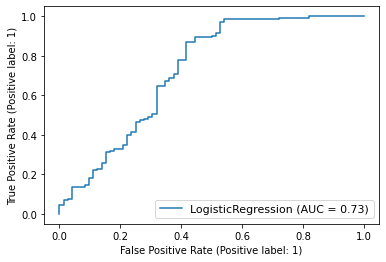

In [41]:
disp = plot_roc_curve(log_reg,x_test,y_test)   

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## Cross validation score from Logistic Regression

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
#Logistic regression

score = cross_val_score(log_reg,X,Y)

print('\033[1m','Cross Validation score of Logistics Regression is :','\033[0m','\n')
print('Score :',score)
print('Mean Score :', score.mean())
print('Standard Deviation :',score.std())

 Cross Validation score of Logistics Regression is :  

Score : [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean Score : 0.8078368652538984
Standard Deviation : 0.02923416378093254


# Now applying other classification algorithm and plotting ROC curve

 Classification Machine Learning Algorithm Evaluation Matrix RandomForestClassifier() is  

Accuracy Score : 
 0.7931034482758621 

Confusion matrix : 
 [[ 37  35]
 [  7 124]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.51      0.64        72
           1       0.78      0.95      0.86       131

    accuracy                           0.79       203
   macro avg       0.81      0.73      0.75       203
weighted avg       0.80      0.79      0.78       203
 



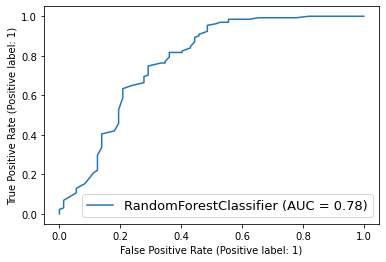

 Classification Machine Learning Algorithm Evaluation Matrix SVC() is  

Accuracy Score : 
 0.8029556650246306 

Confusion matrix : 
 [[ 34  38]
 [  2 129]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.47      0.63        72
           1       0.77      0.98      0.87       131

    accuracy                           0.80       203
   macro avg       0.86      0.73      0.75       203
weighted avg       0.83      0.80      0.78       203
 



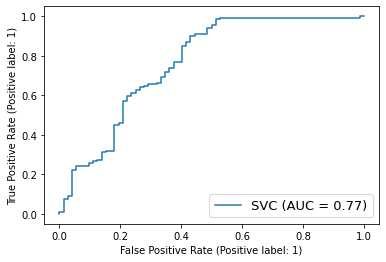

 Classification Machine Learning Algorithm Evaluation Matrix KNeighborsClassifier() is  

Accuracy Score : 
 0.7733990147783252 

Confusion matrix : 
 [[ 34  38]
 [  8 123]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.47      0.60        72
           1       0.76      0.94      0.84       131

    accuracy                           0.77       203
   macro avg       0.79      0.71      0.72       203
weighted avg       0.78      0.77      0.76       203
 



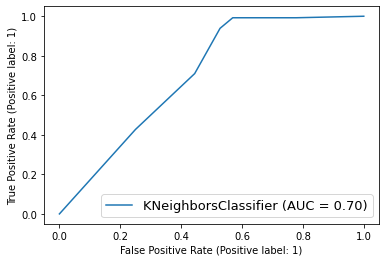

 Classification Machine Learning Algorithm Evaluation Matrix DecisionTreeClassifier() is  

Accuracy Score : 
 0.6798029556650246 

Confusion matrix : 
 [[ 32  40]
 [ 25 106]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.44      0.50        72
           1       0.73      0.81      0.77       131

    accuracy                           0.68       203
   macro avg       0.64      0.63      0.63       203
weighted avg       0.67      0.68      0.67       203
 



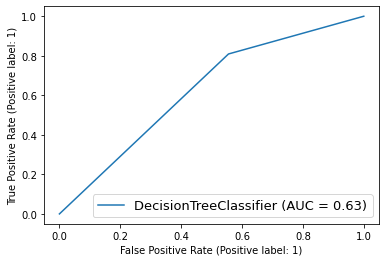

 Classification Machine Learning Algorithm Evaluation Matrix AdaBoostClassifier() is  

Accuracy Score : 
 0.7832512315270936 

Confusion matrix : 
 [[ 37  35]
 [  9 122]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.51      0.63        72
           1       0.78      0.93      0.85       131

    accuracy                           0.78       203
   macro avg       0.79      0.72      0.74       203
weighted avg       0.79      0.78      0.77       203
 



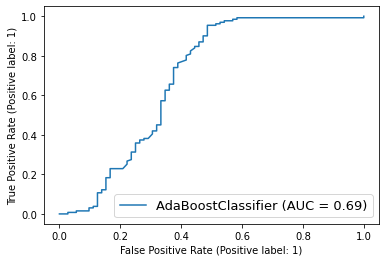

 Classification Machine Learning Algorithm Evaluation Matrix GradientBoostingClassifier() is  

Accuracy Score : 
 0.7586206896551724 

Confusion matrix : 
 [[ 33  39]
 [ 10 121]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.46      0.57        72
           1       0.76      0.92      0.83       131

    accuracy                           0.76       203
   macro avg       0.76      0.69      0.70       203
weighted avg       0.76      0.76      0.74       203
 



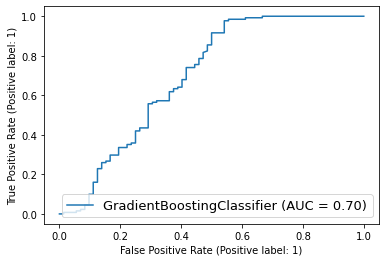

In [61]:
RFC = RandomForestClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()

model = [RFC, SVM, KNN, DTC, ABC, GBC]
       
        
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    
    print('\033[1m','Classification Machine Learning Algorithm Evaluation Matrix',m,'is','\033[0m','\n')
    
    print('Accuracy Score :','\n', accuracy_score(y_test, y_pred),'\n')
    
    print('Confusion matrix :','\n',confusion_matrix(y_test, y_pred),'\n')

    print('Classification Report :','\n',classification_report(y_test, y_pred),'\n')
    
    disp = plot_roc_curve(m,x_test,y_test)   
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()
    print('='*100)

## Now applying cross validation on other algorithms

In [62]:
#Cross Validation

model = [RFC, SVM, KNN, DTC, ABC, GBC]

for i in model:
    score = cross_val_score(i, X, Y, cv =5)
    print('\n')
    print('\033[1m','Cross Validation score',i,'is','\033[0m','\n')
    print('Score :',score)
    print('Mean Score :', score.mean())
    print('Standard Deviation :',score.std())
    print('='*80)



 Cross Validation score RandomForestClassifier() is  

Score : [0.80487805 0.75609756 0.78861789 0.83739837 0.76229508]
Mean Score : 0.7898573903771824
Standard Deviation : 0.02961995475322325


 Cross Validation score SVC() is  

Score : [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
Mean Score : 0.6872984139677463
Standard Deviation : 0.0036872105184800976


 Cross Validation score KNeighborsClassifier() is  

Score : [0.73170732 0.71544715 0.7398374  0.69918699 0.67213115]
Mean Score : 0.7116620018659203
Standard Deviation : 0.024200451766246817


 Cross Validation score DecisionTreeClassifier() is  

Score : [0.74796748 0.69105691 0.7398374  0.69918699 0.74590164]
Mean Score : 0.7247900839664134
Standard Deviation : 0.024506147904269495


 Cross Validation score AdaBoostClassifier() is  

Score : [0.78861789 0.75609756 0.78861789 0.84552846 0.76229508]
Mean Score : 0.7882313741170198
Standard Deviation : 0.031586476508005626


 Cross Validation score GradientBoostingCla

__WE can see here in all models Accuracy score but SVC() gives us good accuracy score of 0.8029556650246306. So now we will perform Hyper Parameter Tuning on SVC__

# Hyper Parameter Tuning

In [63]:
#Import Library

from sklearn.model_selection import GridSearchCV

In [64]:
parameter = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [65]:
grid_src = GridSearchCV(SVC(), parameter, refit=True,verbose=2)

In [66]:
grid_src.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.3s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [67]:
grid_src.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

# Final model

In [68]:
Final_mod = SVC(C=10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Accuracy Score :','\n', accuracy_score(y_test, y_pred))

Accuracy Score : 
 0.7487684729064039


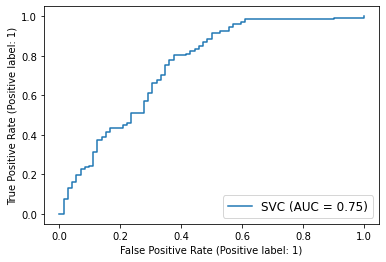

<Figure size 720x720 with 0 Axes>

 Auc Score : 
 0.6958757421543681


In [69]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,x_test,y_test)   
plt.legend(prop={'size':12}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()


from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test))
print('\033[1m','Auc Score :','\033[0m\n',auc_score)

# Saving model

In [70]:
import joblib
joblib.dump(Final_mod,'Loan_asp.pkl')

['Loan_asp.pkl']

## Predicting the saved model

In [72]:
#Lets load the save model and get the predictions

model = joblib.load('Loan_asp.pkl')

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1])

In [73]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
198,0,0
199,1,0
200,0,0
201,0,1
